In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [14]:
df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Univariate and Bivariate analysis

### Statistical analysis

### Data preprosessing

### Feature selection

In [18]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [19]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Train Test split

In [45]:
x=df.drop('Exited',axis=1)
y=df['Exited']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.9,random_state=3,stratify=y)

In [46]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(9000, 10) (1000, 10) (9000,) (1000,)


In [47]:
# Frequency encoding for geography

geo_encoding=xtrain['Geography'].value_counts().to_dict()

In [48]:
xtrain['Geography']=xtrain['Geography'].map(geo_encoding)
xtest['Geography']=xtest['Geography'].map(geo_encoding)

In [49]:
xtrain.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6904,744,2255,Male,29,6,123737.04,2,1,0,141558.04
314,744,2223,Male,36,2,153804.44,1,1,1,87213.33
2963,655,4522,Female,51,3,0.00,2,0,1,15801.02
4274,502,2255,Female,42,0,132002.70,1,0,1,28204.98
3206,515,2255,Male,60,9,113715.36,1,1,0,18424.24


In [52]:
xtrain = pd.get_dummies(xtrain, drop_first=True, dtype='int32')
xtest = pd.get_dummies(xtest,  drop_first=True, dtype='int32')

In [54]:
xtest

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
5371,712,4522,33,3,153819.58,1,1,0,79176.09,1
466,850,2223,32,9,0.00,2,1,1,18924.92,0
1570,717,2223,49,1,110864.38,2,1,1,124532.90,0
9151,614,4522,49,1,0.00,2,1,0,192440.54,1
7841,706,2255,46,7,111288.18,1,1,1,149170.25,0
...,...,...,...,...,...,...,...,...,...,...
5378,606,2255,27,2,130274.26,2,1,0,147533.09,1
2291,598,2223,27,8,90721.52,2,1,0,109296.18,1
548,508,4522,49,7,122451.46,2,1,1,75808.10,1
3672,750,4522,43,6,113882.31,1,1,1,74564.41,1


### Predictive Modeling

In [94]:
accu=[]
recl=[]
prec=[]
f1=[]
model_name=[]

def model_validation(model,xtrain,ytrain,xtest,ytest):
    n=model
    n.fit(xtrain,ytrain)
    pred_h=n.predict(xtest)
    pred_s=n.predict_proba(xtest)[:,1]
    print('Classification report :',classification_report(ytest,pred_h))
    
    print('Roc curve :',roc_auc_score(ytest,pred_s))
    fpr,tpr,thre=roc_curve(ytest,pred_s)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.plot(fpr,tpr)
    plt.show()
    
    
    
    resp=input('Do you want to keep this model ? yes')
    if resp.lower()=='yes':
        model_name.append(n)
        accu.append(accuracy_score(ytest,pred_h))
        recl.append(recall_score(ytest,pred_h))
        prec.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        global df_score
        df_score=pd.DataFrame({'Model':model_name,'Accuracy':accu,'Recall':recl,'Precision':prec,'F1 score':f1})
        
        return n

### Decision tree

Classification report :               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.46      0.56       204

    accuracy                           0.85      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000

Roc curve : 0.8205272686964233


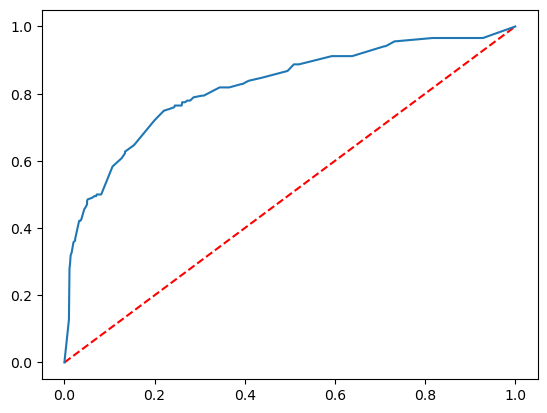

Do you want to keep this model ? yesyes


DecisionTreeClassifier(max_depth=8)

In [95]:
model_validation(DecisionTreeClassifier(max_depth=8),xtrain,ytrain,xtest,ytest)

#### Gaussian

Classification report :               precision    recall  f1-score   support

           0       0.80      0.96      0.87       796
           1       0.35      0.09      0.14       204

    accuracy                           0.78      1000
   macro avg       0.57      0.52      0.51      1000
weighted avg       0.71      0.78      0.72      1000

Roc curve : 0.749735195585772


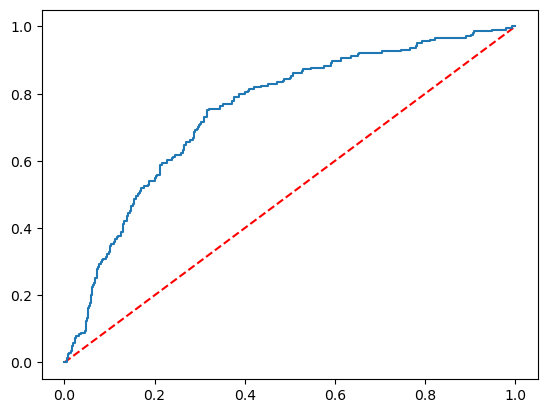

Do you want to keep this model ? yesyes


In [96]:
nb=model_validation(GaussianNB(),xtrain,ytrain,xtest,ytest)

#### Random forest

Classification report :               precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.46      0.58       204

    accuracy                           0.86      1000
   macro avg       0.83      0.71      0.75      1000
weighted avg       0.86      0.86      0.85      1000

Roc curve : 0.8373792984530497


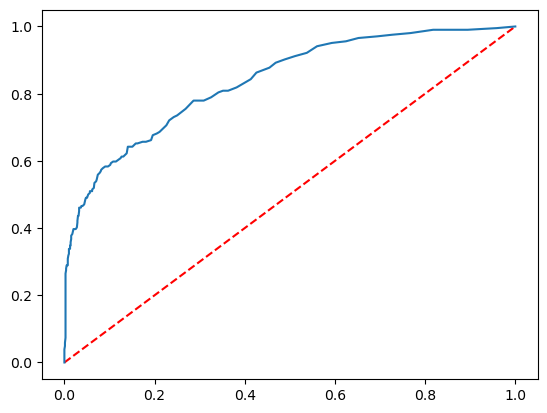

Do you want to keep this model ? yesyes


In [97]:
rf=model_validation(RandomForestClassifier(n_estimators=150),xtrain,ytrain,xtest,ytest)

In [98]:
df_score

,Model,Accuracy,Recall,Precision,F1 score
0,DecisionTreeClassifier(max_depth=8),0.854,0.455882,0.726562,0.560241
1,GaussianNB(),0.780,0.088235,0.346154,0.140625
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.863,0.455882,0.781513,0.575851


#### ADA boost

Classification report :               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000

Roc curve : 0.8258141196176962


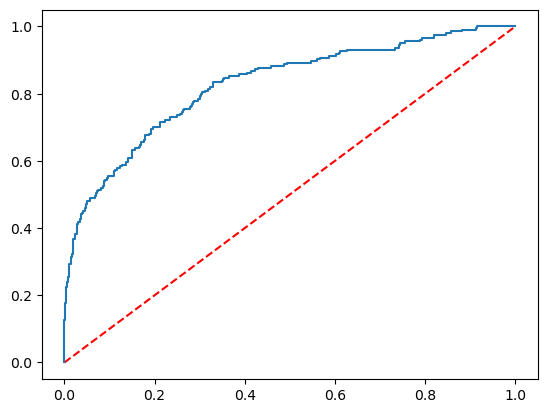

Do you want to keep this model ? yesyes


In [99]:
ada=model_validation(AdaBoostClassifier(n_estimators=150),xtrain,ytrain,xtest,ytest)

### Gradient boost

Classification report :               precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.66      0.43      0.52       204

    accuracy                           0.84      1000
   macro avg       0.76      0.69      0.71      1000
weighted avg       0.82      0.84      0.82      1000

Roc curve : 0.8268055966105035


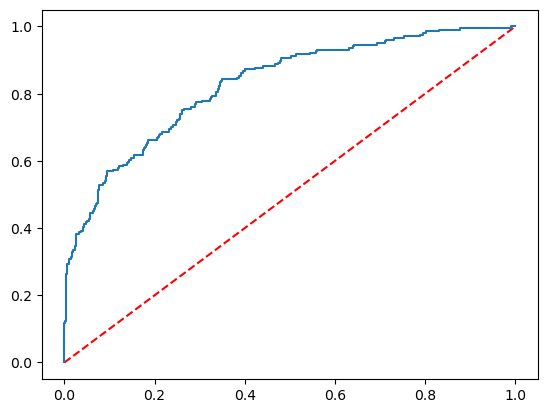

Do you want to keep this model ? yesyes


In [100]:
gbc=model_validation(GradientBoostingClassifier(n_estimators=150,max_depth=9),xtrain,ytrain,xtest,ytest)

#### XGB boost

Classification report :               precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.48      0.57       204

    accuracy                           0.86      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000

Roc curve : 0.834423342201202


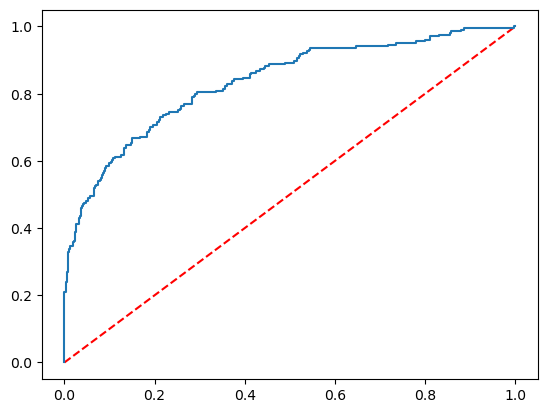

Do you want to keep this model ? yesyes


In [103]:
xgb=model_validation(XGBClassifier(n_estimators=100,max_depth=7),xtrain,ytrain,xtest,ytest)

#### Voting

Classification report :               precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.77      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000

Roc curve : 0.8441903143166815


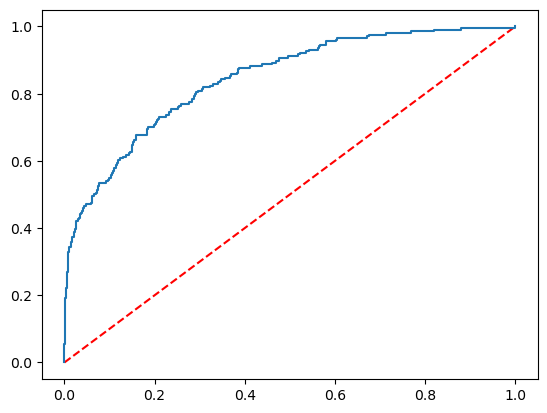

Do you want to keep this model ? yesyes


In [104]:
base_models = [('DT',DecisionTreeClassifier(max_depth=8)),
              ('RF',RandomForestClassifier(n_estimators=150,max_depth=13)),
              ('ADABoost',AdaBoostClassifier(n_estimators=200)),
              ('GB',GradientBoostingClassifier(n_estimators=150,max_depth=10))] 
voting = model_validation(VotingClassifier(estimators=base_models,voting = 'soft'),
                         xtrain,ytrain,xtest,ytest)

#### Stacking

Classification report :               precision    recall  f1-score   support

           0       0.86      0.94      0.90       796
           1       0.65      0.42      0.51       204

    accuracy                           0.83      1000
   macro avg       0.76      0.68      0.71      1000
weighted avg       0.82      0.83      0.82      1000

Roc curve : 0.8006269090550793


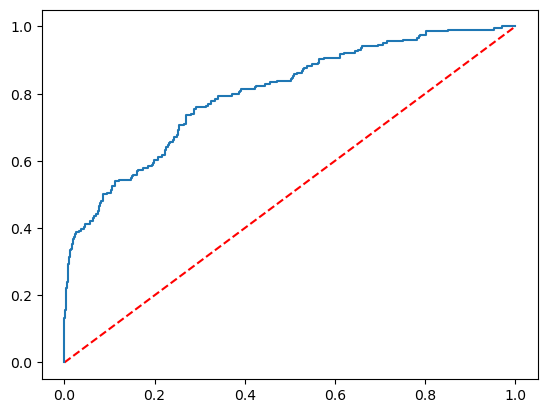

Do you want to keep this model ? yesyes


In [105]:
stacking=model_validation(StackingClassifier(estimators=base_models,final_estimator=XGBClassifier(n_estimators=150,max_depth=10)),xtrain,ytrain,xtest,ytest)

### Model Fine tuning XGB boost

In [107]:
grid={'n_estimators':[100,150,200,250,300,350],
     'gamma':[0,1,2,3],
     'max_depth':[7,10,13,16,19]}

In [108]:
gscv_xgb=GridSearchCV(estimator=XGBClassifier(),param_grid=grid,scoring='recall',cv=5,verbose=1)

In [109]:
gscv_xgb.fit(xtrain,ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 1, 2, 3],
                         'max_depth': [7, 10, 13, 16, 19],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='recall', verbose=1)

### Final Model

Classification report :               precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.66      0.45      0.53       204

    accuracy                           0.84      1000
   macro avg       0.76      0.70      0.72      1000
weighted avg       0.83      0.84      0.83      1000

Roc curve : 0.816133362892896


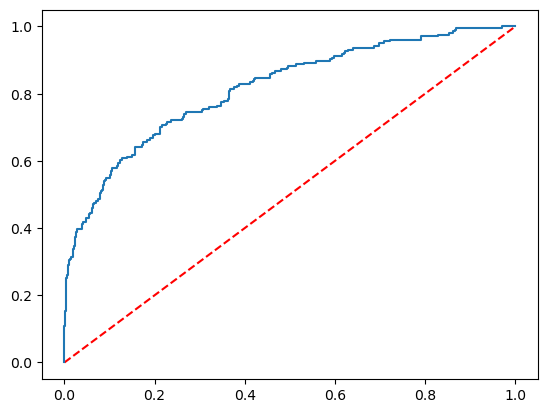

Do you want to keep this model ? yesyes


In [111]:
final_model = model_validation(XGBClassifier(**gscv_xgb.best_params_),
                              xtrain, ytrain,xtest,ytest)

## Prediction

In [113]:
geo_encoding

{'France': 4522, 'Germany': 2255, 'Spain': 2223}

In [114]:
final_model.predict(([[675,4522,35,4,12000,2,1,0,60000,0]]))[0]

0

### Save the model

In [115]:
import pickle

In [116]:
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)